Pre-Requisites:

- pystan
- prophet

In [ ]:
pip install pystan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install prophet

In [ ]:
from prophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/AirPassengers.csv')
df.head(5)
df = df.rename(columns={'#Passengers': 'y', 'Month':'ds'})

In [ ]:
df.tail(5)

,ds,y
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [ ]:
df['y_orig'] = df['y']
print(df.head(5))

        ds    y  y_orig
0  1949-01  112     112
1  1949-02  118     118
2  1949-03  132     132
3  1949-04  129     129
4  1949-05  121     121


In [ ]:
# to save a copy of the original data..you'll see why shortly.
df['y'] = np.log(df['y'])

In [ ]:
df.head(5)

,ds,y,y_orig
0,1949-01,4.718499,112
1,1949-02,4.770685,118
2,1949-03,4.882802,132
3,1949-04,4.859812,129
4,1949-05,4.795791,121


In [ ]:
model = Prophet() #instantiate Prophet
model.fit(df)

#train_test_split: df: train/test, then run the code for train, compare the prediction vs test

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpli8ukgin/1f55_z9b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpli8ukgin/d921x8p3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16995', 'data', 'file=/tmp/tmpli8ukgin/1f55_z9b.json', 'init=/tmp/tmpli8ukgin/d921x8p3.json', 'output', 'file=/tmp/tmpli8ukgin/prophet_modeleho2yky3/prophet_model-20240803164629.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:46:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:46:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
'''     'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''
#future_data = model.make_future_dataframe(periods=6, freq = 'H')
future_data = model.make_future_dataframe(periods=13, freq = 'M')

In [ ]:
forecast_data = model.predict(future_data)

In [ ]:
forecast_data.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
152,1961-08-31,6.283725,6.321601,6.412714,6.269486,6.296595,0.081866,0.081866,0.081866,0.081866,0.081866,0.081866,0.0,0.0,0.0,6.365591
153,1961-09-30,6.292651,6.157102,6.254843,6.275744,6.308857,-0.084710,-0.084710,-0.084710,-0.084710,-0.084710,-0.084710,0.0,0.0,0.0,6.207941
154,1961-10-31,6.301875,6.021128,6.123201,6.281885,6.320107,-0.227995,-0.227995,-0.227995,-0.227995,-0.227995,-0.227995,0.0,0.0,0.0,6.073880
155,1961-11-30,6.310801,6.165647,6.269064,6.288204,6.332510,-0.095485,-0.095485,-0.095485,-0.095485,-0.095485,-0.095485,0.0,0.0,0.0,6.215316
156,1961-12-31,6.320025,6.191761,6.297298,6.293671,6.344630,-0.074361,-0.074361,-0.074361,-0.074361,-0.074361,-0.074361,0.0,0.0,0.0,6.245663


In [ ]:

forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
152,1961-08-31,6.365591,6.321601,6.412714
153,1961-09-30,6.207941,6.157102,6.254843
154,1961-10-31,6.073880,6.021128,6.123201
155,1961-11-30,6.215316,6.165647,6.269064
156,1961-12-31,6.245663,6.191761,6.297298


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


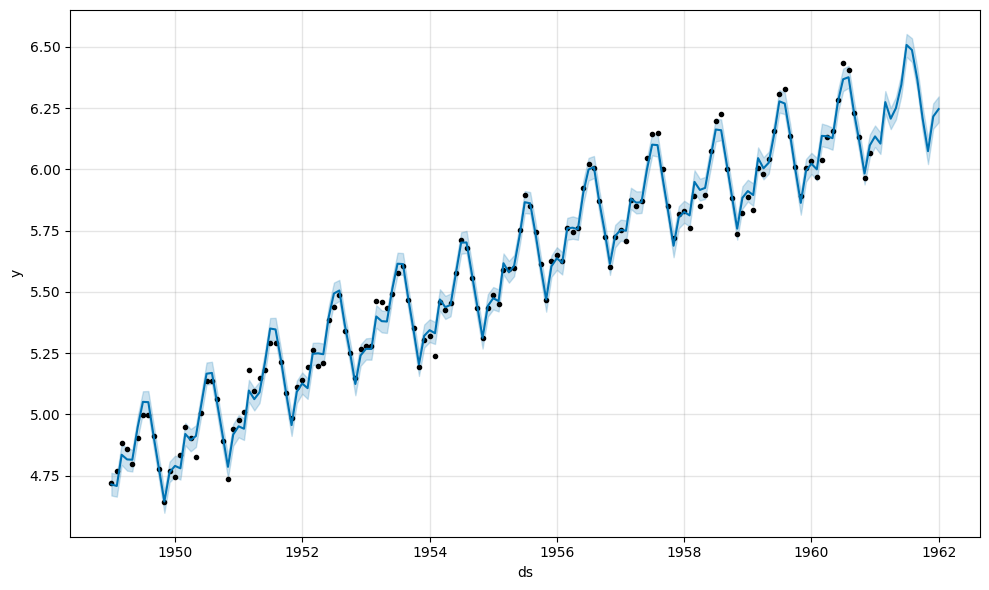

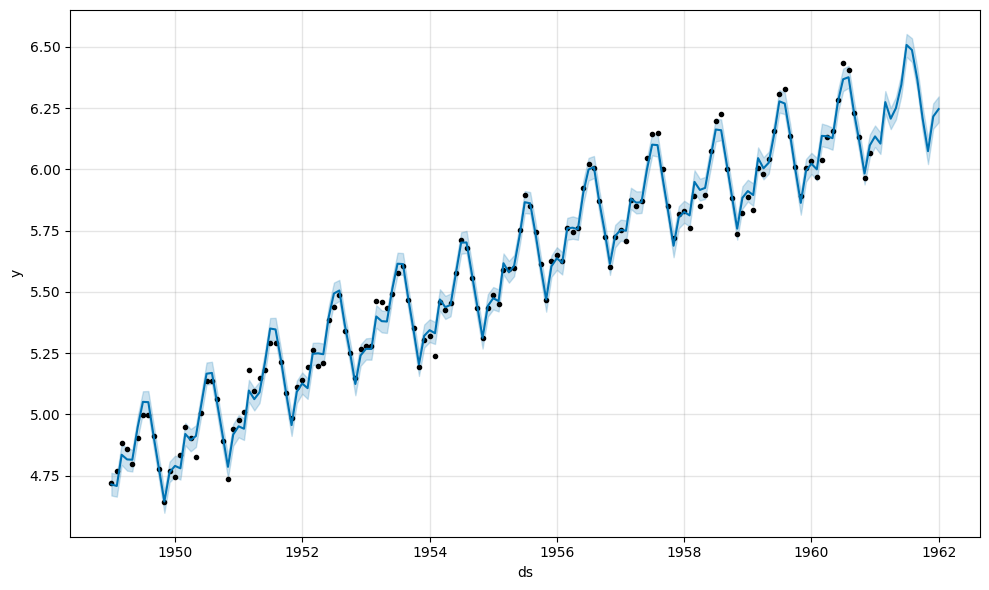

In [ ]:
model.plot(forecast_data)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

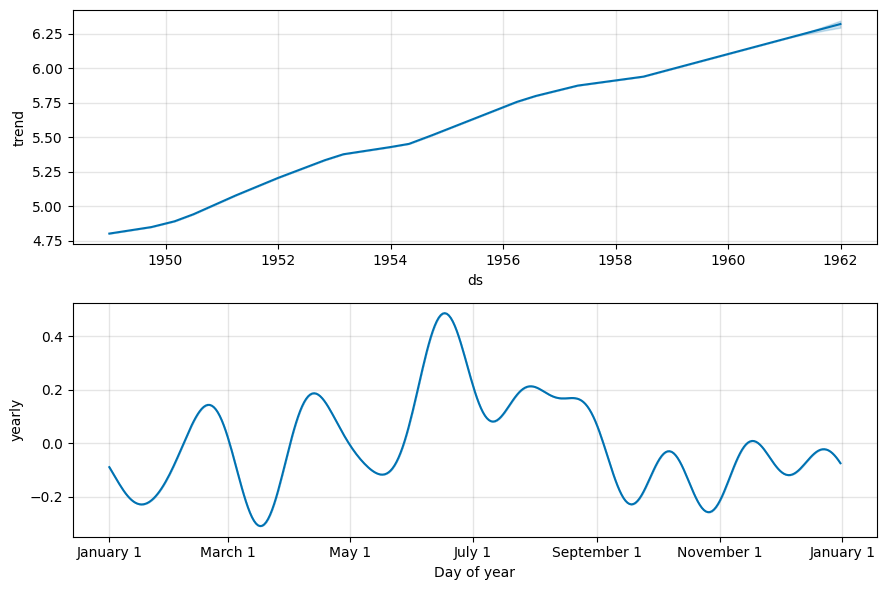

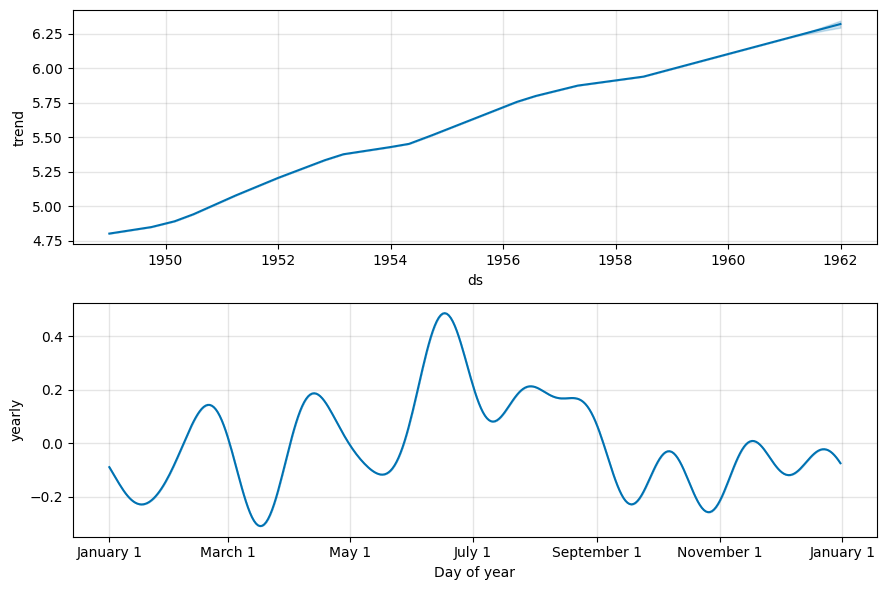

In [ ]:
model.plot_components(forecast_data)

In [ ]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


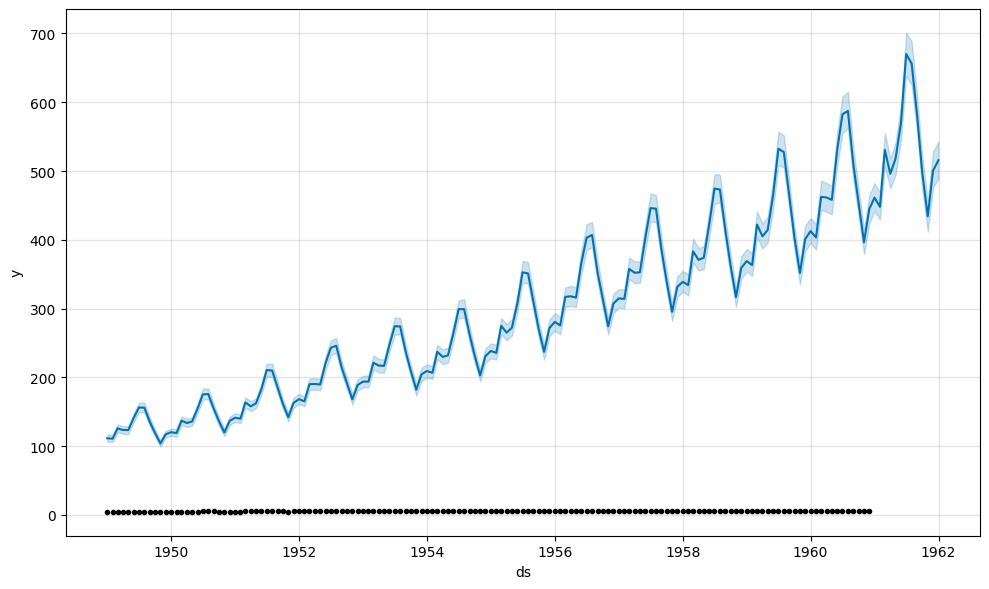

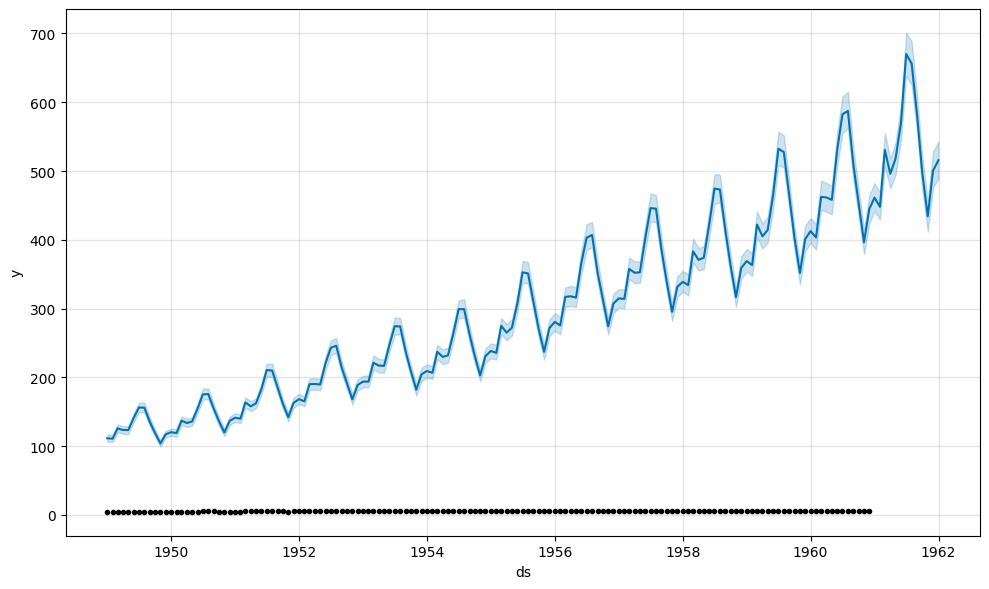

In [ ]:
model.plot(forecast_data_orig)

In [ ]:
df['y_log']=df['y'] #copy the log-transformed data to another column
df['y']=df['y_orig']

In [ ]:
final_df = pd.DataFrame(forecast_data_orig)

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

In [ ]:
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], image_width=400, image_height=400)
#py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], filename = 'templates/' +'filename.html', auto_open=False)

'temp-plot.html'